<a href="https://colab.research.google.com/github/Paulj1989/diabetic-ice-cream/blob/main/train.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Training a Convolutional Neural Network

Using a convolutional neural network to predict diabetic retinopathy from previously graded images, in an attempt to prove that computers are going to steal my friends job and render him useless.

In [1]:
!pip install -Uqq fastai
from fastai.vision.all import *

     |████████████████████████████████| 213 kB 5.2 MB/s 
     |████████████████████████████████| 61 kB 10.1 MB/s 


In [2]:
!git clone https://github.com/javathunderman/retinopathy-dataset

Cloning into 'retinopathy-dataset'...
remote: Enumerating objects: 2072, done.
remote: Total 2072 (delta 0), reused 0 (delta 0), pack-reused 2072
Receiving objects: 100% (2072/2072), 1.84 GiB | 38.82 MiB/s, done.
Resolving deltas: 100% (1/1), done.
Checking out files: 100% (2064/2064), done.


In [3]:
ice_creams = 'nosymptoms','symptoms'
path = Path('retinopathy-dataset')

In [4]:
creamy = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.3, seed=42),
    get_y=parent_label,
    item_tfms=RandomResizedCrop(224, min_scale=0.5))

In [5]:
dls = creamy.dataloaders(path)

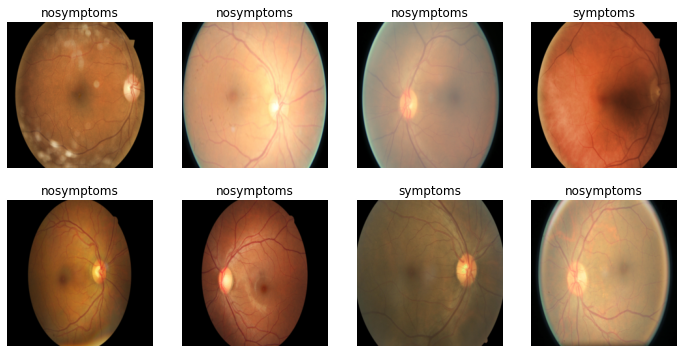

In [6]:
dls.valid.show_batch(max_n=8, nrows=2)

In [8]:
learn = vision_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(10)

epoch,train_loss,valid_loss,error_rate,time
0,1.134802,0.650196,0.275081,04:18


epoch,train_loss,valid_loss,error_rate,time
0,0.832675,0.543260,0.237864,04:18
1,0.763147,0.649088,0.305825,04:19
2,0.679603,0.517860,0.190939,04:18
3,0.636685,0.542223,0.200647,04:21
4,0.542076,0.594833,0.215210,04:17
5,0.458709,0.539834,0.220065,04:16
6,0.370600,0.503650,0.187702,04:16
7,0.297434,0.514513,0.181230,04:15
8,0.254104,0.509002,0.184466,04:16
9,0.217386,0.511228,0.179612,04:15


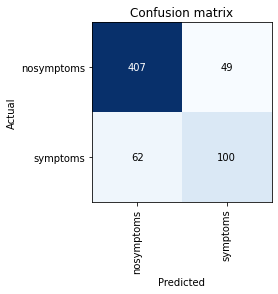

In [9]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

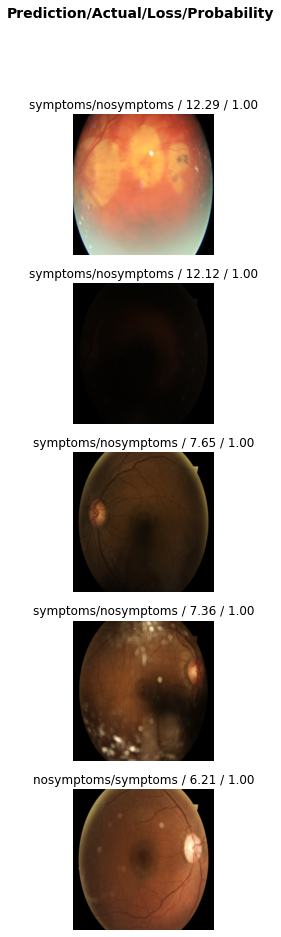

In [10]:
interp.plot_top_losses(5, nrows=5)